In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

**Завантажити датасет Ірис. Роздрукувати перші 5 рядочків**

In [21]:
iris = load_iris()
x = iris.data

pd.DataFrame(x, columns=iris.feature_names).head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Методом ліктя визначити оптимальну кількість кластерів.**

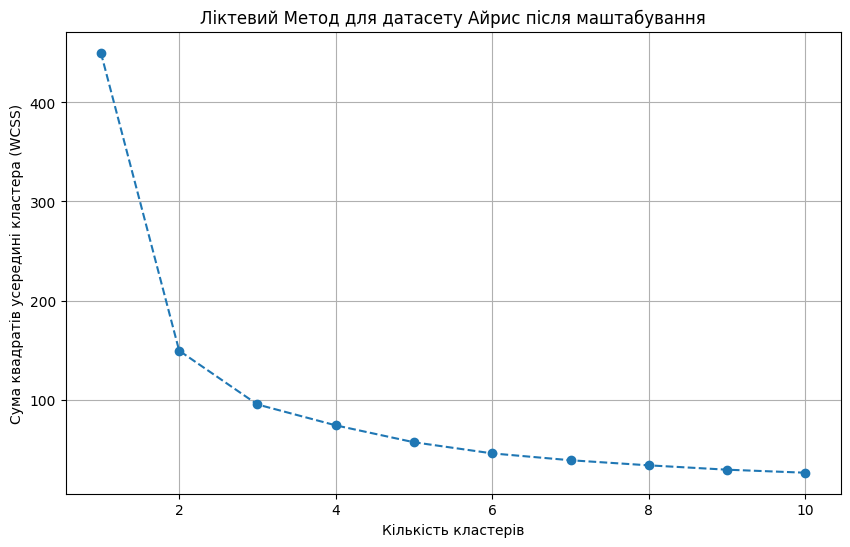

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_2d = pd.DataFrame(X_scaled, columns=iris.feature_names).iloc[:, 1:]

#Ліктевий метод
wcss_2d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_2d)
    wcss_2d.append(kmeans.inertia_)

# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Ліктевий Метод для датасету Айрис після маштабування')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сума квадратів усередині кластера (WCSS)')
plt.grid(True)
plt.show()

**Методом силуєтів визначити оптимальну кількість кластерів.**

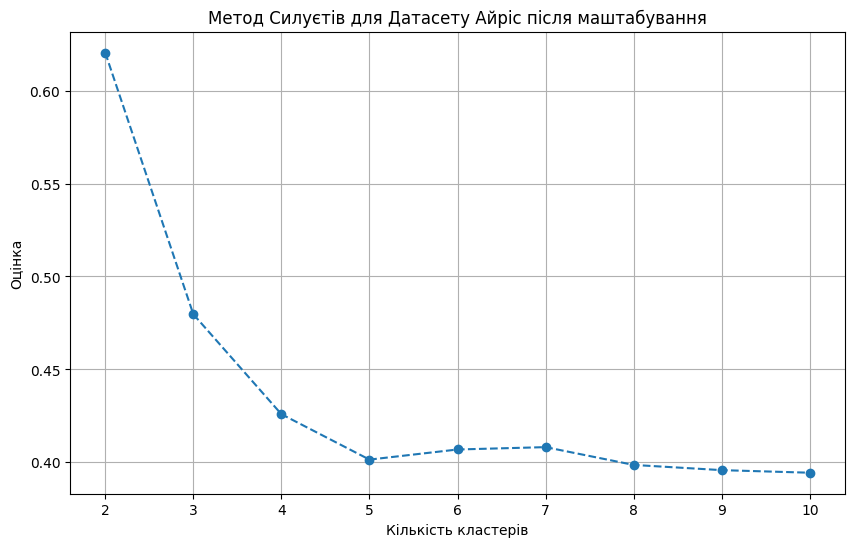

In [23]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_2d)
    silhouette_avg = silhouette_score(X_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод Силуєтів для Датасету Айріс після маштабування')
plt.xlabel('Кількість кластерів')
plt.ylabel('Оцінка')
plt.grid(True)
plt.show()

**Візуалізувати кластери.**

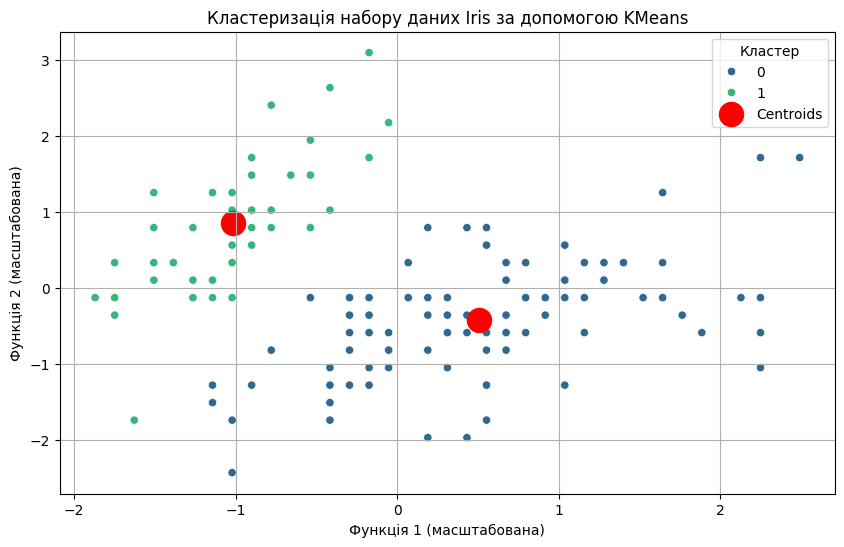

In [24]:
import seaborn as sns
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центроїди')
plt.title('Кластеризація набору даних Iris за допомогою KMeans')
plt.xlabel('Функція 1 (масштабована)')
plt.ylabel('Функція 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Завдання 2

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files

**Завантажити датасет**

In [7]:
uploaded = files.upload()

Saving Student_data.csv to Student_data.csv


In [34]:
df = pd.read_csv('Student_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


**Роздрукувати перші 5 рядків.**

In [33]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


**Вивести розмір датасета, типи даних**

In [35]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [36]:
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Перевірити на пропущені значення.

In [38]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
df.isnull().sum()


Перевірка на пропущені значення:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


**Перевірити на дублікати. Вивести описову статистику.**

In [39]:
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()



Перевірка наявності дублікатів:


np.int64(0)

In [13]:
# Описова статистика
print("\nОписова статистика:")
df.describe()


Описова статистика:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


**Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.**

In [40]:
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Random Forest

In [41]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Найкращі параметри для Випадкового лісу:", grid_search_rf.best_params_)
print("Найкраща точність перехресної перевірки для випадкового лісу:", grid_search_rf.best_score_)

y_pred_rf = grid_search_rf.predict(X_test)
print("Точність тесту для випадкового лісу:", accuracy_score(y_test, y_pred_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Найкращі параметри для Випадкового лісу: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Найкраща точність перехресної перевірки для випадкового лісу: 0.9210640711932525
Точність тесту для випадкового лісу: 0.9123173277661796


2. Logistic Regression

In [42]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr = LogisticRegression(random_state=42, max_iter=1000)

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

print("Найкращі параметри для логістичної регресії:", grid_search_lr.best_params_)
print("Найкраща точність перехресної перевірки для логістичної регресії:", grid_search_lr.best_score_)

y_pred_lr = grid_search_lr.predict(X_test)
print("Точність тесту для логістичної регресії:", accuracy_score(y_test, y_pred_lr))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Найкращі параметри для логістичної регресії: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Найкраща точність перехресної перевірки для логістичної регресії: 0.7710333137396963
Точність тесту для логістичної регресії: 0.7432150313152401


3. Support Vector Machine (SVM)

In [43]:
# Параметри для пошуку
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Модель
svm = SVC(random_state=42)

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Найкращі параметри та точність
print("Найкращі параметри для SVM:", grid_search_svm.best_params_)
print("Найкраща точність перехресної перевірки для SVM:", grid_search_svm.best_score_)

# Оцінка на тестовій вибірці
y_pred_svm = grid_search_svm.predict(X_test)
print("Точність тесту для SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Найкращі параметри для SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Найкраща точність перехресної перевірки для SVM: 0.8557147348707502
Точність тесту для SVM: 0.824634655532359


Порівняння результатів

In [44]:
print("Точність тесту для випадкового лісу:", accuracy_score(y_test, y_pred_rf))
print("Точність тесту для логістичної регресії:", accuracy_score(y_test, y_pred_lr))
print("Точність тесту для SVM:", accuracy_score(y_test, y_pred_svm))

print("Звіт про класифікацію для найкращої моделі (випадковий ліс, логістична регресія або SVM):")
print(classification_report(y_test, y_pred_rf))  # Або y_pred_lr, або y_pred_svm, залежно від найкращої моделі


Точність тесту для випадкового лісу: 0.9123173277661796
Точність тесту для логістичної регресії: 0.7432150313152401
Точність тесту для SVM: 0.824634655532359
Звіт про класифікацію для найкращої моделі (випадковий ліс, логістична регресія або SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



Метод ліктя

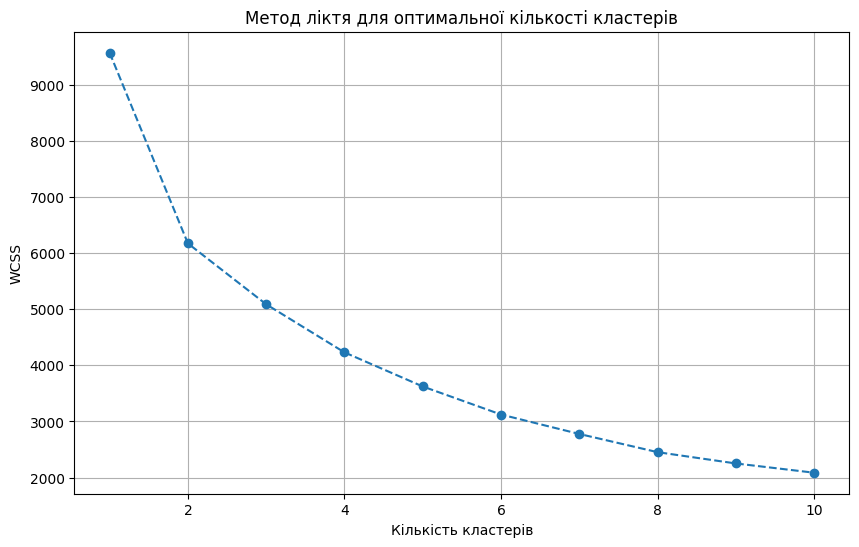

In [45]:
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод ліктя для оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Метод силуєтів

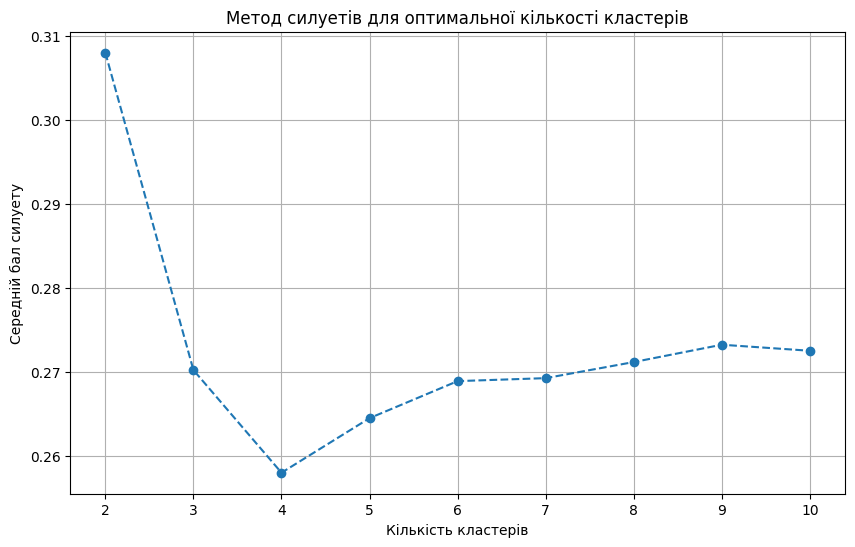

In [47]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів для оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній бал силуету')
plt.grid(True)
plt.show()